In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pt
import matplotlib.ticker as ticker
import datetime
from sklearn.cluster import KMeans
%matplotlib inline

In [2]:
!gdown --id 1gL1H9LUfAJ1SRqg9Apo6_tI-UQEAo_Ay

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1gL1H9LUfAJ1SRqg9Apo6_tI-UQEAo_Ay
To: /content/ARIMA-dataset.csv
100% 2.51M/2.51M [00:00<00:00, 47.0MB/s]


In [3]:
data = pd.read_csv('/content/ARIMA-dataset.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47091 entries, 0 to 47090
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   time       47091 non-null  object 
 1   lat        47091 non-null  float64
 2   lon        47091 non-null  float64
 3   dev_acc_d  45527 non-null  float64
dtypes: float64(3), object(1)
memory usage: 1.4+ MB


In [4]:
data['dev_acc_d'].isnull().values.any()

True

In [5]:
index = data['dev_acc_d'].index[data['dev_acc_d'].apply(np.isnan)]
data.drop(index, axis=0, inplace=True)

In [6]:
data['time'] = pd.to_datetime(data['time'], format="%Y-%m-%d %H:%M:%S.%f")
data['year'] = data['time'].dt.year
data['month'] = data['time'].dt.month
data['day'] = data['time'].dt.day
data['hour'] = data['time'].dt.hour
data['week_day'] = data['time'].dt.dayofweek

In [7]:
data['dist_per_day'] = data['dev_acc_d'].diff()

In [8]:
data['dist_per_day'][0] = 0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [9]:
data2 = data.groupby('day').agg('sum')['dist_per_day'].to_frame(name='total_dist_per_day').reset_index()

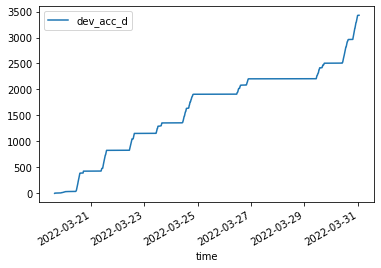

In [10]:
data.plot(x = 'time', y = 'dev_acc_d')
pt.show()

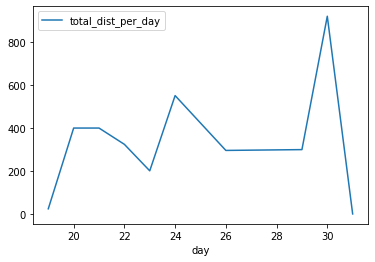

In [11]:
data2.plot(x = 'day', y = 'total_dist_per_day')
pt.show()

In [12]:
data3 = data2.set_index('day')

In [13]:
from statsmodels.tsa.stattools import adfuller
X = data3.total_dist_per_day.values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: 0.481267
p-value: 0.984292
Critical Values:
	1%: -5.354
	5%: -3.646
	10%: -2.901


In [14]:
first_diffs = data3.total_dist_per_day.values[1:] - data3.total_dist_per_day.values[:-1]
first_diffs = np.concatenate([first_diffs, [0]])

In [15]:
data3['FirstDifference'] = first_diffs

In [16]:
X = data3.FirstDifference.values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -4.541499
p-value: 0.000165
Critical Values:
	1%: -4.665
	5%: -3.367
	10%: -2.803


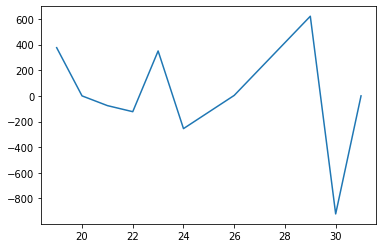

In [17]:
pt.plot(data3.FirstDifference)
pt.show()

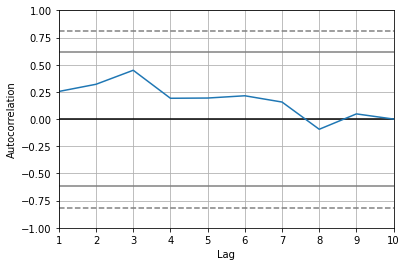

In [18]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(data2)
pt.show()

In [19]:
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import timedelta
from pandas.plotting import register_matplotlib_converters
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARMA
register_matplotlib_converters()
from time import time
from pandas import DataFrame
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  # This is added back by InteractiveShellApp.init_path()


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


                               SARIMAX Results                                
Dep. Variable:     total_dist_per_day   No. Observations:                   10
Model:                 ARIMA(3, 1, 0)   Log Likelihood                 -61.293
Date:                Fri, 18 Nov 2022   AIC                            130.585
Time:                        19:49:07   BIC                            131.374
Sample:                             0   HQIC                           128.883
                                 - 10                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.6502      1.122     -1.471      0.141      -3.849       0.549
ar.L2         -1.4103      1.697     -0.831      0.406      -4.737       1.916
ar.L3         -0.4722      1.425     -0.331      0.7

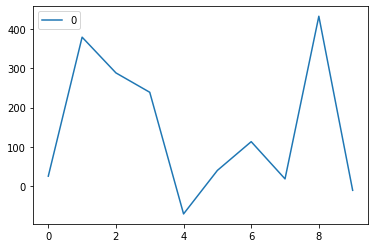

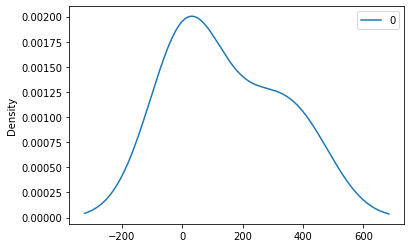

                0
count   10.000000
mean   145.410727
std    176.573925
min    -71.007038
25%     19.989016
50%     76.484070
75%    276.024340
max    432.760363


In [20]:
#fit model
model = ARIMA(data2.total_dist_per_day, order=(3,1,0))
model_fit = model.fit()
# summary of fit model
print(model_fit.summary())
# line plot of residuals
residuals = DataFrame(model_fit.resid)
residuals.plot()
pt.show()
# density plot of residuals
residuals.plot(kind='kde')
pt.show()
# summary stats of residuals
print(residuals.describe())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


predicted=552.444285, expected=297.042210
predicted=297.042046, expected=300.806880
predicted=370.255855, expected=922.060740
predicted=141.479102, expected=1.269300
Test RMSE: 312.006


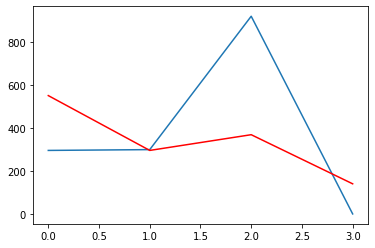

In [21]:
# split into train and test sets
X = data3.total_dist_per_day.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
    model = ARIMA(history, order=(3,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

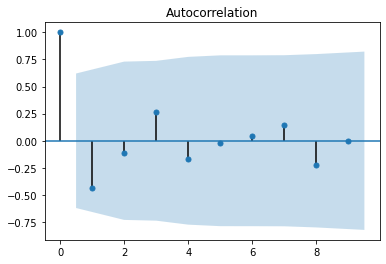

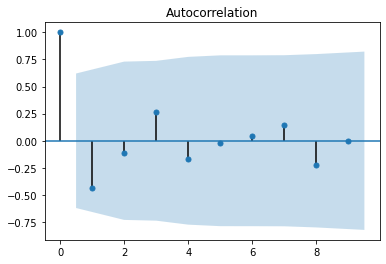

In [23]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
plot_acf(data3.FirstDifference)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


                               SARIMAX Results                                
Dep. Variable:     total_dist_per_day   No. Observations:                   10
Model:                 ARIMA(2, 1, 0)   Log Likelihood                 -61.999
Date:                Fri, 18 Nov 2022   AIC                            129.998
Time:                        19:49:24   BIC                            130.589
Sample:                             0   HQIC                           128.721
                                 - 10                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.2798      0.461     -2.778      0.005      -2.183      -0.377
ar.L2         -0.8208      0.355     -2.313      0.021      -1.516      -0.125
sigma2      4.123e+04   2.84e+04      1.451      0.1

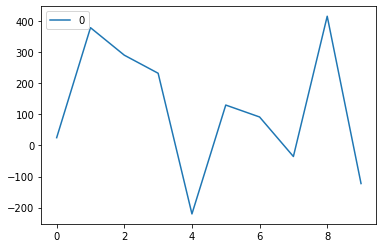

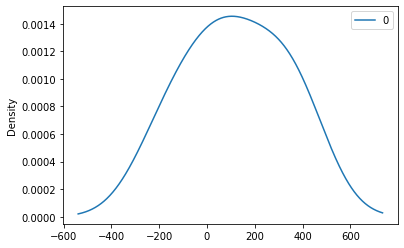

                0
count   10.000000
mean   118.854204
std    212.408462
min   -220.472179
25%    -20.299050
50%    111.063308
75%    276.428450
max    416.443815


In [24]:
#fit model
model = ARIMA(data2.total_dist_per_day, order=(2,1,0))
model_fit = model.fit()
# summary of fit model
print(model_fit.summary())
# line plot of residuals
residuals = DataFrame(model_fit.resid)
residuals.plot()
pt.show()
# density plot of residuals
residuals.plot(kind='kde')
pt.show()
# summary stats of residuals
print(residuals.describe())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


predicted=399.387133, expected=297.042210
predicted=321.974869, expected=300.806880
predicted=452.191453, expected=922.060740
predicted=347.322271, expected=1.269300
Test RMSE: 296.417


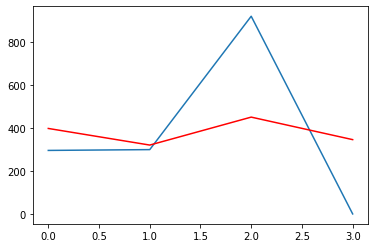

In [25]:
# split into train and test sets
X = data3.total_dist_per_day.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
    model = ARIMA(history, order=(2,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()